# Pre-Lab ELN TroubleshootingdF/F Traces

### Name: Kylie Joyce


### Date: 03/08/2022


### PID: 730333803


### Jupyter Notebook Number: 7

## Purpose/Objective:
The purpose of this notebook is to troublshoot the exploration of the dF/F traces from last week. We got to a point where the data was able to create a dF/F trace, however, the trace was not representing all the data we needed and it was also throwing errors when trying to call ophys experiment ids. We are hoping to fix this error in this lab session before we get to build our figures. 

## Protocol:
1. Import the Allen data.
2. Import the data set breakdown we did last class (This will take up a lot of space but it will be easy to just copy over from last week's lab).
3. Run through all the code from last week.
4. Test the finding of all ophys experiment ids in hopes of making a trace that reflects all the data we need (will probably take up majority of class time because we will need to run it and troubleshoot after).
5. If we can get working traces and we have time, we will assess the traces created and code used to create them to fully understand what is being presented.
6. If we have time, after assessing this, we will use the traces to understand how many animals are being presented and look to make an average. (Done after creating the traces)

## Expected Results:
We expect to successfully troubleshoot and build traces of all animals overlayed on each other. We also expect to be able to breakdown the traces to see if what is shown on the original trace (is it all individual animals or is it an average of all animals?). If it is successful and it is an average, we would look into using this average code to average all the data for one data set. This will then be used to quanitify neuronal activity peaks which will be used for ANOVA testing. 

### Installing AllenSDK into your local environment. 

In [1]:
pip install allensdk

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/nas/longleaf/apps/anaconda/2019.10.ood/envs/py379/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


### Import Packages:

In [2]:
import os
import shutil
import allensdk
import pprint
from pathlib import Path

import numpy as np
import pandas as pd
import scipy.stats as st

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_context('notebook', font_scale=1.5, rc={'lines.markeredgewidth': 2})

### If working with Visual Coding: 2P Ca2+ Imaging Data use the following code block to import the cache object and point it to the data already downloaded and stored on LongLeaf.  Do not change this code.

In [3]:
#this code block should only be run if you are working with the brain observatory Ca2+ imaging data
from allensdk.core.brain_observatory_cache import BrainObservatoryCache

drive_path = '/overflow/NSCI274/projects/BrainObservatoryOPhysData/'

manifest_file = os.path.join(drive_path,'manifest.json')

boc = BrainObservatoryCache(manifest_file=manifest_file)

### If working with Visual Behavior: 2P Ca2+ Imaging Data use the following code block to import the cache object and point it to the data already downloaded and stored on LongLeaf.  Do not change this code.

In [4]:
#this code block should only be run if you are working with the visual behavior Ca2+ imaging data
from allensdk.brain_observatory.behavior.behavior_project_cache import VisualBehaviorOphysProjectCache

data_storage_directory = Path("/overflow/NSCI274/projects/ophysdata")

cache = VisualBehaviorOphysProjectCache.from_s3_cache(cache_dir=data_storage_directory)

### Allen Brain Data

In [41]:
ophys_sessions = cache.get_ophys_session_table()

print(f"Total number of ophys sessions: {len(ophys_sessions)}\n")

print(ophys_sessions.columns)

ophys_sessions.head()

Total number of ophys sessions: 705

Index(['equipment_name', 'full_genotype', 'mouse_id', 'reporter_line',
       'driver_line', 'sex', 'age_in_days', 'cre_line', 'indicator',
       'session_number', 'prior_exposures_to_session_type',
       'prior_exposures_to_image_set', 'prior_exposures_to_omissions',
       'behavior_session_id', 'ophys_experiment_id', 'ophys_container_id',
       'project_code', 'date_of_acquisition', 'session_type'],
      dtype='object')


,equipment_name,full_genotype,mouse_id,reporter_line,driver_line,sex,age_in_days,cre_line,indicator,session_number,prior_exposures_to_session_type,prior_exposures_to_image_set,prior_exposures_to_omissions,behavior_session_id,ophys_experiment_id,ophys_container_id,project_code,date_of_acquisition,session_type
ophys_session_id,,,,,,,,,,,,,,,,,,,
951410079,MESO.1,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,457841,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],F,206.0,Sst-IRES-Cre,GCaMP6f,1.0,0.0,65.0,0.0,951520319,"[951980471, 951980473, 951980475, 951980479, 9...","[1018028360, 1018028345, 1018028357, 101802834...",VisualBehaviorMultiscope,2019-09-20 09:45:29.897856,OPHYS_1_images_A
952430817,MESO.1,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,457841,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],F,209.0,Sst-IRES-Cre,GCaMP6f,2.0,0.0,66.0,1.0,952554548,"[953659743, 953659745, 953659749, 953659752]","[1018028357, 1018028345, 1018028339, 1018028354]",VisualBehaviorMultiscope,2019-09-23 08:13:07.627573,OPHYS_2_images_A_passive
954954402,MESO.1,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,457841,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],F,210.0,Sst-IRES-Cre,GCaMP6f,3.0,0.0,67.0,2.0,953982960,"[958527464, 958527471, 958527474, 958527479, 9...","[1018028360, 1018028342, 1018028357, 101802835...",VisualBehaviorMultiscope,2019-09-24 16:00:00.000000,OPHYS_3_images_A
955775716,MESO.1,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,457841,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],F,212.0,Sst-IRES-Cre,GCaMP6f,3.0,1.0,68.0,3.0,956010809,"[956941841, 956941844, 956941846]","[1018028342, 1018028339, 1018028345]",VisualBehaviorMultiscope,2019-09-26 08:44:37.199778,OPHYS_3_images_A
957020350,MESO.1,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,457841,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],F,213.0,Sst-IRES-Cre,GCaMP6f,4.0,0.0,0.0,4.0,957032492,"[957759562, 957759564, 957759566, 957759570, 9...","[1018028354, 1018028345, 1018028360, 101802834...",VisualBehaviorMultiscope,2019-09-27 08:28:05.415005,OPHYS_4_images_B


In [5]:
ophys_experiments = cache.get_ophys_experiment_table()

print(f"Total number of ophys experiments: {len(ophys_experiments)}\n")

print(ophys_experiments.columns)

ophys_experiments.head(100)

Total number of ophys experiments: 1941

Index(['equipment_name', 'full_genotype', 'mouse_id', 'reporter_line',
       'driver_line', 'sex', 'age_in_days', 'cre_line', 'indicator',
       'session_number', 'prior_exposures_to_session_type',
       'prior_exposures_to_image_set', 'prior_exposures_to_omissions',
       'ophys_session_id', 'behavior_session_id', 'ophys_container_id',
       'project_code', 'imaging_depth', 'targeted_structure',
       'date_of_acquisition', 'session_type', 'experience_level', 'passive',
       'image_set', 'file_id'],
      dtype='object')


,equipment_name,full_genotype,mouse_id,reporter_line,driver_line,sex,age_in_days,cre_line,indicator,session_number,...,ophys_container_id,project_code,imaging_depth,targeted_structure,date_of_acquisition,session_type,experience_level,passive,image_set,file_id
ophys_experiment_id,,,,,,,,,,,,,,,,,,,,,
951980486,MESO.1,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,457841,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],F,206.0,Sst-IRES-Cre,GCaMP6f,1.0,...,1018028360,VisualBehaviorMultiscope,300,VISl,2019-09-20 09:45:29.897856,OPHYS_1_images_A,Familiar,False,A,1085400869
951980473,MESO.1,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,457841,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],F,206.0,Sst-IRES-Cre,GCaMP6f,1.0,...,1018028345,VisualBehaviorMultiscope,225,VISp,2019-09-20 09:45:29.897856,OPHYS_1_images_A,Familiar,False,A,1085400919
951980481,MESO.1,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,457841,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],F,206.0,Sst-IRES-Cre,GCaMP6f,1.0,...,1018028357,VisualBehaviorMultiscope,225,VISl,2019-09-20 09:45:29.897856,OPHYS_1_images_A,Familiar,False,A,1085400972
951980471,MESO.1,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,457841,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],F,206.0,Sst-IRES-Cre,GCaMP6f,1.0,...,1018028342,VisualBehaviorMultiscope,150,VISp,2019-09-20 09:45:29.897856,OPHYS_1_images_A,Familiar,False,A,1085394308
951980475,MESO.1,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,457841,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],F,206.0,Sst-IRES-Cre,GCaMP6f,1.0,...,1018028339,VisualBehaviorMultiscope,75,VISp,2019-09-20 09:45:29.897856,OPHYS_1_images_A,Familiar,False,A,1085400920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
878358326,CAM2P.4,Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai94(TITL-G...,448900,Ai94(TITL-GCaMP6s),"[Slc17a7-IRES2-Cre, Camk2a-tTA]",M,136.0,Slc17a7-IRES2-Cre,GCaMP6s,6.0,...,863992815,VisualBehavior,175,VISp,2019-05-30 17:29:35.000000,OPHYS_6_images_B,Novel >1,False,B,879255318
939327156,CAM2P.3,Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-G...,459777,Ai93(TITL-GCaMP6f),"[Slc17a7-IRES2-Cre, Camk2a-tTA]",F,180.0,Slc17a7-IRES2-Cre,GCaMP6f,1.0,...,930022332,VisualBehavior,175,VISp,2019-09-04 15:26:03.000000,OPHYS_1_images_A,Familiar,False,A,939486362
940354166,CAM2P.3,Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-G...,459777,Ai93(TITL-GCaMP6f),"[Slc17a7-IRES2-Cre, Camk2a-tTA]",F,181.0,Slc17a7-IRES2-Cre,GCaMP6f,2.0,...,930022332,VisualBehavior,175,VISp,2019-09-05 15:43:21.000000,OPHYS_2_images_A_passive,Familiar,True,A,940418592


### A cleaner way to have our data organized (also keeps the ophys_experiment_ids)

#### Male Familiar

In [6]:
plsmales1 = ophys_experiments[(ophys_experiments.sex=='M') &
                            (ophys_experiments.full_genotype=='Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt')&
                            (ophys_experiments.targeted_structure=='VISp')&
                             (ophys_experiments.session_type=='OPHYS_2_images_A_passive')]

plsmales2 = ophys_experiments[(ophys_experiments.sex=='M') &
                            (ophys_experiments.full_genotype=='Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt')&
                            (ophys_experiments.targeted_structure=='VISp')&
                             (ophys_experiments.session_type=='OPHYS_2_images_B_passive')]

plsmales3 = ophys_experiments[(ophys_experiments.sex=='M') &
                            (ophys_experiments.full_genotype=='Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt')&
                            (ophys_experiments.targeted_structure=='VISp')&
                             (ophys_experiments.session_type=='OPHYS_2_images_A_passive')]

plsmales4 = ophys_experiments[(ophys_experiments.sex=='M') &
                            (ophys_experiments.full_genotype=='Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt')&
                            (ophys_experiments.targeted_structure=='VISp')&
                             (ophys_experiments.session_type=='OPHYS_2_images_B_passive')]

# males familiar total is plsmales1 + plsmales2 + plsmales3 + plsmales4
plsmalesf = pd.concat([plsmales1, plsmales2], axis=0)

plsmalesf = pd.concat([plsmalesf, plsmales3], axis=0)

plsmalesf = pd.concat([plsmalesf, plsmales4], axis=0)
            
plsmalesf

,equipment_name,full_genotype,mouse_id,reporter_line,driver_line,sex,age_in_days,cre_line,indicator,session_number,...,ophys_container_id,project_code,imaging_depth,targeted_structure,date_of_acquisition,session_type,experience_level,passive,image_set,file_id
ophys_experiment_id,,,,,,,,,,,,,,,,,,,,,
961283857,CAM2P.5,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,467302,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],M,174.0,Sst-IRES-Cre,GCaMP6f,2.0,...,957024596,VisualBehavior,290,VISp,2019-10-04 21:12:37.000000,OPHYS_2_images_A_passive,Familiar,True,A,961328900
1050720434,CAM2P.3,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,533527,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],M,121.0,Sst-IRES-Cre,GCaMP6f,2.0,...,1049224697,VisualBehavior,275,VISp,2020-09-15 18:01:45.000000,OPHYS_2_images_A_passive,Familiar,True,A,1050776175
1081264133,MESO.1,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,546605,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],M,182.0,Sst-IRES-Cre,GCaMP6f,2.0,...,1079027847,VisualBehaviorMultiscope,306,VISp,2021-02-03 09:02:40.051049,OPHYS_2_images_A_passive,Familiar,True,A,1120144562
1081264129,MESO.1,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,546605,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],M,182.0,Sst-IRES-Cre,GCaMP6f,2.0,...,1079027842,VisualBehaviorMultiscope,229,VISp,2021-02-03 09:02:40.051049,OPHYS_2_images_A_passive,Familiar,True,A,1120144552
1007929142,CAM2P.3,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,495789,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],M,159.0,Sst-IRES-Cre,GCaMP6f,2.0,...,1006071814,VisualBehavior,275,VISp,2020-02-17 16:45:53.000000,OPHYS_2_images_A_passive,Familiar,True,A,1007966514
1081832027,CAM2P.3,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,546819,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],M,183.0,Sst-IRES-Cre,GCaMP6f,2.0,...,1080284671,VisualBehavior,275,VISp,2021-02-05 22:18:01.000000,OPHYS_2_images_A_passive,Familiar,True,A,1120143039
1043218895,CAM2P.4,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,524274,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],M,149.0,Sst-IRES-Cre,GCaMP6f,2.0,...,1039579201,VisualBehavior,275,VISp,2020-08-14 17:53:53.000000,OPHYS_2_images_A_passive,Familiar,True,A,1044397946
867410509,MESO.1,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,448366,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],M,118.0,Sst-IRES-Cre,GCaMP6f,2.0,...,1018028429,VisualBehaviorMultiscope,225,VISp,2019-05-13 12:36:19.000000,OPHYS_2_images_A_passive,Familiar,True,A,1085397924
867410516,MESO.1,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,448366,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],M,118.0,Sst-IRES-Cre,GCaMP6f,2.0,...,1018028423,VisualBehaviorMultiscope,75,VISp,2019-05-13 12:36:19.000000,OPHYS_2_images_A_passive,Familiar,True,A,1085397946


In [7]:
new_mf = plsmalesf.index
for x in new_mf:
    print(x)

961283857
1050720434
1081264133
1081264129
1007929142
1081832027
1043218895
867410509
867410516
867410512
977247468
977247466
851093285
851093287
851093289
857698006
1083518258
994053903
992572516
980673831
1010530054
1001535125
984551228
836911939
1049610116
1049610120
939471245
939471248
939471272
939471278
939471269
881949070
881949066
881949068
881949073
947798775
947798771
947798777
875564370
875564398
875564401
917820362
917820370
917820358
809497730
933338719
967008454
932372699
932372701
932372705
963394081


#### Male Novel 

In [8]:
plsmales5 = ophys_experiments[(ophys_experiments.sex=='M') &
                            (ophys_experiments.full_genotype=='Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt')&
                            (ophys_experiments.targeted_structure=='VISp')&
                             (ophys_experiments.session_type=='OPHYS_5_images_A_passive')]

plsmales6 = ophys_experiments[(ophys_experiments.sex=='M') &
                            (ophys_experiments.full_genotype=='Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt')&
                            (ophys_experiments.targeted_structure=='VISp')&
                             (ophys_experiments.session_type=='OPHYS_5_images_B_passive')]

plsmales7 = ophys_experiments[(ophys_experiments.sex=='M') &
                            (ophys_experiments.full_genotype=='Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt')&
                            (ophys_experiments.targeted_structure=='VISp')&
                             (ophys_experiments.session_type=='OPHYS_5_images_A_passive')]

plsmales8 = ophys_experiments[(ophys_experiments.sex=='M') &
                            (ophys_experiments.full_genotype=='Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt')&
                            (ophys_experiments.targeted_structure=='VISp')&
                             (ophys_experiments.session_type=='OPHYS_5_images_B_passive')]

# males novel total is plsmales5 + plsmales6 + plsmales7 + plsmales8

plsmalesn = pd.concat([plsmales5, plsmales6], axis=0)

plsmalesn = pd.concat([plsmalesn, plsmales7], axis=0)

plsmalesn = pd.concat([plsmalesn, plsmales8], axis=0)
            
plsmalesn

,equipment_name,full_genotype,mouse_id,reporter_line,driver_line,sex,age_in_days,cre_line,indicator,session_number,...,ophys_container_id,project_code,imaging_depth,targeted_structure,date_of_acquisition,session_type,experience_level,passive,image_set,file_id
ophys_experiment_id,,,,,,,,,,,,,,,,,,,,,
995622557,CAM2P.4,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,476970,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],M,203.0,Sst-IRES-Cre,GCaMP6f,5.0,...,991913453,VisualBehaviorTask1B,275,VISp,2019-12-20 18:26:12.000000,OPHYS_5_images_A_passive,Novel >1,True,A,995659072
993593393,CAM2P.3,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,485688,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],M,149.0,Sst-IRES-Cre,GCaMP6f,5.0,...,989461845,VisualBehaviorTask1B,275,VISp,2019-12-10 17:38:29.000000,OPHYS_5_images_A_passive,Novel >1,True,A,993634306
982862427,CAM2P.3,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,477202,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],M,165.0,Sst-IRES-Cre,GCaMP6f,5.0,...,975371413,VisualBehaviorTask1B,275,VISp,2019-11-14 20:10:30.000000,OPHYS_5_images_A_passive,Novel >1,True,A,982976718
1012112426,CAM2P.3,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,498972,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],M,152.0,Sst-IRES-Cre,GCaMP6f,5.0,...,1006386845,VisualBehaviorTask1B,275,VISp,2020-03-03 18:24:50.000000,OPHYS_5_images_A_passive,Novel >1,True,A,1012177053
1003456269,CAM2P.3,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,489056,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],M,177.0,Sst-IRES-Cre,GCaMP6f,6.0,...,999191979,VisualBehaviorTask1B,275,VISp,2020-01-28 19:38:04.000000,OPHYS_5_images_A_passive,Novel >1,False,A,1003552807
990381322,CAM2P.3,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,480753,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],M,159.0,Sst-IRES-Cre,GCaMP6f,5.0,...,978206330,VisualBehaviorTask1B,275,VISp,2019-11-25 16:47:30.000000,OPHYS_5_images_A_passive,Novel >1,True,A,990431717
965930965,CAM2P.5,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,467302,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],M,181.0,Sst-IRES-Cre,GCaMP6f,5.0,...,957024596,VisualBehavior,290,VISp,2019-10-11 19:10:15.000000,OPHYS_5_images_B_passive,Novel >1,True,B,966777641
1051989532,CAM2P.3,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,533527,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],M,127.0,Sst-IRES-Cre,GCaMP6f,5.0,...,1049224697,VisualBehavior,275,VISp,2020-09-21 18:19:24.000000,OPHYS_5_images_B_passive,Novel >1,True,B,1052030734
1082434498,MESO.1,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,546605,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],M,187.0,Sst-IRES-Cre,GCaMP6f,5.0,...,1079027842,VisualBehaviorMultiscope,232,VISp,2021-02-08 08:59:10.254858,OPHYS_5_images_B_passive,Novel >1,True,B,1120144551


#### Female Familiar

In [9]:
plsfemales1 = ophys_experiments[(ophys_experiments.sex=='F') &
                            (ophys_experiments.full_genotype=='Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt')&
                            (ophys_experiments.targeted_structure=='VISp')&
                             (ophys_experiments.session_type=='OPHYS_2_images_A_passive')]

plsfemales2 = ophys_experiments[(ophys_experiments.sex=='F') &
                            (ophys_experiments.full_genotype=='Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt')&
                            (ophys_experiments.targeted_structure=='VISp')&
                             (ophys_experiments.session_type=='OPHYS_2_images_B_passive')]

plsfemales3 = ophys_experiments[(ophys_experiments.sex=='F') &
                            (ophys_experiments.full_genotype=='Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt')&
                            (ophys_experiments.targeted_structure=='VISp')&
                             (ophys_experiments.session_type=='OPHYS_2_images_A_passive')]

plsfemales4 = ophys_experiments[(ophys_experiments.sex=='F') &
                            (ophys_experiments.full_genotype=='Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt')&
                            (ophys_experiments.targeted_structure=='VISp')&
                             (ophys_experiments.session_type=='OPHYS_2_images_B_passive')]

# females familiar total is plsfemales1 + plsfemales2 + plsfemales3 + plsfemales4

plsfemalesf = pd.concat([plsfemales1, plsfemales2], axis=0)

plsfemalesf = pd.concat([plsfemalesf, plsfemales3], axis=0)

plsfemalesf = pd.concat([plsfemalesf, plsfemales4], axis=0)
            
plsfemalesf

,equipment_name,full_genotype,mouse_id,reporter_line,driver_line,sex,age_in_days,cre_line,indicator,session_number,...,ophys_container_id,project_code,imaging_depth,targeted_structure,date_of_acquisition,session_type,experience_level,passive,image_set,file_id
ophys_experiment_id,,,,,,,,,,,,,,,,,,,,,
953659743,MESO.1,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,457841,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],F,209.0,Sst-IRES-Cre,GCaMP6f,2.0,...,1018028345,VisualBehaviorMultiscope,225,VISp,2019-09-23 08:13:07.627573,OPHYS_2_images_A_passive,Familiar,True,A,1086012706
953659745,MESO.1,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,457841,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],F,209.0,Sst-IRES-Cre,GCaMP6f,2.0,...,1018028339,VisualBehaviorMultiscope,75,VISp,2019-09-23 08:13:07.627573,OPHYS_2_images_A_passive,Familiar,True,A,1086012793
956903375,CAM2P.5,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,470784,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],F,150.0,Sst-IRES-Cre,GCaMP6f,2.0,...,941373529,VisualBehaviorTask1B,275,VISp,2019-09-26 17:34:33.000000,OPHYS_2_images_B_passive,Familiar,True,B,957356891
798404219,CAM2P.4,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,412036,Ai148(TIT2L-GC6f-ICL-tTA2),[Vip-IRES-Cre],F,156.0,Vip-IRES-Cre,GCaMP6f,2.0,...,791352433,VisualBehavior,175,VISp,2018-12-18 23:26:29.000000,OPHYS_2_images_A_passive,Familiar,True,A,859888258
1066177684,CAM2P.3,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,538219,Ai148(TIT2L-GC6f-ICL-tTA2),[Vip-IRES-Cre],F,167.0,Vip-IRES-Cre,GCaMP6f,2.0,...,1064333290,VisualBehavior,175,VISp,2020-11-25 16:08:44.000000,OPHYS_2_images_A_passive,Familiar,True,A,1066218438
1053774037,CAM2P.4,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,523927,Ai148(TIT2L-GC6f-ICL-tTA2),[Vip-IRES-Cre],F,198.0,Vip-IRES-Cre,GCaMP6f,2.0,...,1051327176,VisualBehavior,175,VISp,2020-09-30 17:24:54.000000,OPHYS_2_images_A_passive,Familiar,True,A,1053806242
1052412559,MESO.1,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,528097,Ai148(TIT2L-GC6f-ICL-tTA2),[Vip-IRES-Cre],F,168.0,Vip-IRES-Cre,GCaMP6f,2.0,...,1052096554,VisualBehaviorMultiscope,152,VISp,2020-09-23 13:02:03.191894,OPHYS_2_images_A_passive,Familiar,True,A,1086012409
943134119,CAM2P.4,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,468866,Ai148(TIT2L-GC6f-ICL-tTA2),[Vip-IRES-Cre],F,146.0,Vip-IRES-Cre,GCaMP6f,2.0,...,929913236,VisualBehavior,175,VISp,2019-09-10 17:57:45.000000,OPHYS_2_images_A_passive,Familiar,True,A,944214327
993590480,CAM2P.4,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,489066,Ai148(TIT2L-GC6f-ICL-tTA2),[Vip-IRES-Cre],F,128.0,Vip-IRES-Cre,GCaMP6f,2.0,...,991913246,VisualBehaviorTask1B,175,VISp,2019-12-10 19:59:47.000000,OPHYS_2_images_B_passive,Familiar,True,B,993635143


#### Female Novel

In [10]:
plsfemales5 = ophys_experiments[(ophys_experiments.sex=='F') &
                            (ophys_experiments.full_genotype=='Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt')&
                            (ophys_experiments.targeted_structure=='VISp')&
                             (ophys_experiments.session_type=='OPHYS_5_images_A_passive')]

plsfemales6 = ophys_experiments[(ophys_experiments.sex=='F') &
                            (ophys_experiments.full_genotype=='Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt')&
                            (ophys_experiments.targeted_structure=='VISp')&
                             (ophys_experiments.session_type=='OPHYS_5_images_B_passive')]

plsfemales7 = ophys_experiments[(ophys_experiments.sex=='F') &
                            (ophys_experiments.full_genotype=='Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt')&
                            (ophys_experiments.targeted_structure=='VISp')&
                             (ophys_experiments.session_type=='OPHYS_5_images_A_passive')]

plsfemales8 = ophys_experiments[(ophys_experiments.sex=='F') &
                            (ophys_experiments.full_genotype=='Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt')&
                            (ophys_experiments.targeted_structure=='VISp')&
                             (ophys_experiments.session_type=='OPHYS_5_images_B_passive')]

# females novel total is plsfemales5 + plsfemales6 + plsfemales7 + plsfemales8

plsfemalesn = pd.concat([plsfemales5, plsfemales6], axis=0)

plsfemalesn = pd.concat([plsfemalesn, plsfemales7], axis=0)

plsfemalesn = pd.concat([plsfemalesn, plsfemales8], axis=0)
            
plsfemalesn

,equipment_name,full_genotype,mouse_id,reporter_line,driver_line,sex,age_in_days,cre_line,indicator,session_number,...,ophys_container_id,project_code,imaging_depth,targeted_structure,date_of_acquisition,session_type,experience_level,passive,image_set,file_id
ophys_experiment_id,,,,,,,,,,,,,,,,,,,,,
960351917,CAM2P.5,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,470784,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],F,156.0,Sst-IRES-Cre,GCaMP6f,5.0,...,941373529,VisualBehaviorTask1B,275,VISp,2019-10-02 18:23:56.000000,OPHYS_5_images_A_passive,Novel >1,True,A,960425985
959388790,MESO.1,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,457841,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],F,217.0,Sst-IRES-Cre,GCaMP6f,5.0,...,1018028345,VisualBehaviorMultiscope,225,VISp,2019-10-01 08:25:28.921369,OPHYS_5_images_B_passive,Novel >1,True,B,1086012436
959388792,MESO.1,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,457841,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],F,217.0,Sst-IRES-Cre,GCaMP6f,5.0,...,1018028339,VisualBehaviorMultiscope,75,VISp,2019-10-01 08:25:28.921369,OPHYS_5_images_B_passive,Novel >1,True,B,1086012475
959388788,MESO.1,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,457841,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],F,217.0,Sst-IRES-Cre,GCaMP6f,5.0,...,1018028342,VisualBehaviorMultiscope,150,VISp,2019-10-01 08:25:28.921369,OPHYS_5_images_B_passive,Novel >1,True,B,1086012491
994053909,CAM2P.4,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,489066,Ai148(TIT2L-GC6f-ICL-tTA2),[Vip-IRES-Cre],F,130.0,Vip-IRES-Cre,GCaMP6f,5.0,...,991913246,VisualBehaviorTask1B,175,VISp,2019-12-12 17:15:46.000000,OPHYS_5_images_A_passive,Novel >1,True,A,994100291
994956406,CAM2P.4,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,489066,Ai148(TIT2L-GC6f-ICL-tTA2),[Vip-IRES-Cre],F,135.0,Vip-IRES-Cre,GCaMP6f,5.0,...,991913246,VisualBehaviorTask1B,175,VISp,2019-12-17 17:04:36.000000,OPHYS_5_images_A_passive,Novel >1,True,A,995001686
1006813726,CAM2P.4,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,492395,Ai148(TIT2L-GC6f-ICL-tTA2),[Vip-IRES-Cre],F,174.0,Vip-IRES-Cre,GCaMP6f,5.0,...,1000740620,VisualBehaviorTask1B,175,VISp,2020-02-12 21:26:58.000000,OPHYS_5_images_A_passive,Novel >1,True,A,1006855146
796108483,CAM2P.4,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,412036,Ai148(TIT2L-GC6f-ICL-tTA2),[Vip-IRES-Cre],F,153.0,Vip-IRES-Cre,GCaMP6f,5.0,...,791352433,VisualBehavior,175,VISp,2018-12-15 20:56:37.000000,OPHYS_5_images_B_passive,Novel >1,True,B,859888310
1069286458,CAM2P.4,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,544261,Ai148(TIT2L-GC6f-ICL-tTA2),[Vip-IRES-Cre],F,142.0,Vip-IRES-Cre,GCaMP6f,5.0,...,1064333322,VisualBehavior,175,VISp,2020-12-09 21:54:37.000000,OPHYS_5_images_B_passive,Novel >1,True,B,1069316918


### Beginning to create dF/F traces

#### "Prefered magic functions for jupyter notebook"

In [11]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

#### Check again how many sessions and format it

In [12]:
print('Number of male inhibitory familiar sessions = {}'.format(len(plsmalesf)))

Number of male inhibitory familiar sessions = 51


In [13]:
print('Number of male inhibitory novel sessions = {}'.format(len(plsmalesn)))

Number of male inhibitory novel sessions = 48


In [14]:
print('Number of female inhibitory familiar sessions = {}'.format(len(plsfemalesf)))

Number of female inhibitory familiar sessions = 11


In [15]:
print('Number of female inhibitory novel sessions = {}'.format(len(plsfemalesn)))

Number of female inhibitory novel sessions = 13


#### Get Ophys_experiment_ids from plsmalesf

In [16]:
ophys_session_idmf = plsmalesf.index.values[0]
ophys_session_idmf

961283857

In [17]:
plsmalesf.index(ophys_session_idmf==961283857)

TypeError: 'Int64Index' object is not callable

In [18]:
plsmalesf

,equipment_name,full_genotype,mouse_id,reporter_line,driver_line,sex,age_in_days,cre_line,indicator,session_number,...,ophys_container_id,project_code,imaging_depth,targeted_structure,date_of_acquisition,session_type,experience_level,passive,image_set,file_id
ophys_experiment_id,,,,,,,,,,,,,,,,,,,,,
961283857,CAM2P.5,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,467302,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],M,174.0,Sst-IRES-Cre,GCaMP6f,2.0,...,957024596,VisualBehavior,290,VISp,2019-10-04 21:12:37.000000,OPHYS_2_images_A_passive,Familiar,True,A,961328900
1050720434,CAM2P.3,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,533527,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],M,121.0,Sst-IRES-Cre,GCaMP6f,2.0,...,1049224697,VisualBehavior,275,VISp,2020-09-15 18:01:45.000000,OPHYS_2_images_A_passive,Familiar,True,A,1050776175
1081264133,MESO.1,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,546605,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],M,182.0,Sst-IRES-Cre,GCaMP6f,2.0,...,1079027847,VisualBehaviorMultiscope,306,VISp,2021-02-03 09:02:40.051049,OPHYS_2_images_A_passive,Familiar,True,A,1120144562
1081264129,MESO.1,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,546605,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],M,182.0,Sst-IRES-Cre,GCaMP6f,2.0,...,1079027842,VisualBehaviorMultiscope,229,VISp,2021-02-03 09:02:40.051049,OPHYS_2_images_A_passive,Familiar,True,A,1120144552
1007929142,CAM2P.3,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,495789,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],M,159.0,Sst-IRES-Cre,GCaMP6f,2.0,...,1006071814,VisualBehavior,275,VISp,2020-02-17 16:45:53.000000,OPHYS_2_images_A_passive,Familiar,True,A,1007966514
1081832027,CAM2P.3,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,546819,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],M,183.0,Sst-IRES-Cre,GCaMP6f,2.0,...,1080284671,VisualBehavior,275,VISp,2021-02-05 22:18:01.000000,OPHYS_2_images_A_passive,Familiar,True,A,1120143039
1043218895,CAM2P.4,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,524274,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],M,149.0,Sst-IRES-Cre,GCaMP6f,2.0,...,1039579201,VisualBehavior,275,VISp,2020-08-14 17:53:53.000000,OPHYS_2_images_A_passive,Familiar,True,A,1044397946
867410509,MESO.1,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,448366,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],M,118.0,Sst-IRES-Cre,GCaMP6f,2.0,...,1018028429,VisualBehaviorMultiscope,225,VISp,2019-05-13 12:36:19.000000,OPHYS_2_images_A_passive,Familiar,True,A,1085397924
867410516,MESO.1,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,448366,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],M,118.0,Sst-IRES-Cre,GCaMP6f,2.0,...,1018028423,VisualBehaviorMultiscope,75,VISp,2019-05-13 12:36:19.000000,OPHYS_2_images_A_passive,Familiar,True,A,1085397946


In [19]:
plsmalesf.mouse_id.unique()

array([467302, 533527, 546605, 495789, 546819, 524274, 448366, 482853,
       440631, 549976, 476970, 485688, 477202, 498972, 489056, 480753,
       429952, 523922, 453989, 453988, 435431, 453991, 449653, 453990,
       421136, 467951, 467953, 467954])

In [20]:
ophys_experiment_ids = plsmalesf.loc[ophys_session_idmf].ophys_experiment_id
print(ophys_experiment_ids)

AttributeError: 'Series' object has no attribute 'ophys_experiment_id'

Code ran for the trace and for loop immediately below but the trace didn't give us everything we needed and this failed so we are hoping to get this working this time!

In [21]:
ophys_experiment_idsmf = []

for i in range(len(plsmalesf)):
    ophys_experiment_id = plsmalesf.index.values[i]
    ophys_experiment_idsmf.append(ophys_experiment_id)

print(ophys_experiment_idsmf)

[961283857, 1050720434, 1081264133, 1081264129, 1007929142, 1081832027, 1043218895, 867410509, 867410516, 867410512, 977247468, 977247466, 851093285, 851093287, 851093289, 857698006, 1083518258, 994053903, 992572516, 980673831, 1010530054, 1001535125, 984551228, 836911939, 1049610116, 1049610120, 939471245, 939471248, 939471272, 939471278, 939471269, 881949070, 881949066, 881949068, 881949073, 947798775, 947798771, 947798777, 875564370, 875564398, 875564401, 917820362, 917820370, 917820358, 809497730, 933338719, 967008454, 932372699, 932372701, 932372705, 963394081]


In [22]:
for i, ophys_experiment in enumerate(ophys_experiment_idsmf): 
    print(i,ophys_experiment)

0 961283857
1 1050720434
2 1081264133
3 1081264129
4 1007929142
5 1081832027
6 1043218895
7 867410509
8 867410516
9 867410512
10 977247468
11 977247466
12 851093285
13 851093287
14 851093289
15 857698006
16 1083518258
17 994053903
18 992572516
19 980673831
20 1010530054
21 1001535125
22 984551228
23 836911939
24 1049610116
25 1049610120
26 939471245
27 939471248
28 939471272
29 939471278
30 939471269
31 881949070
32 881949066
33 881949068
34 881949073
35 947798775
36 947798771
37 947798777
38 875564370
39 875564398
40 875564401
41 917820362
42 917820370
43 917820358
44 809497730
45 933338719
46 967008454
47 932372699
48 932372701
49 932372705
50 963394081


#### Make male familiar traces

(0.0, 0.25)

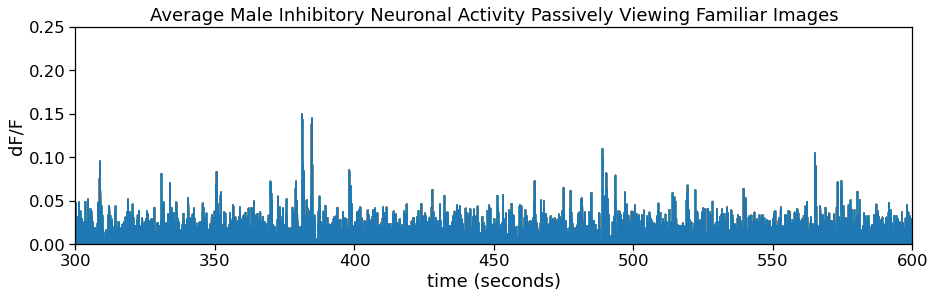

In [21]:
fig, ax = plt.subplots(1,1, figsize=(15,4))
# enumerate over experiments in this session
for i, ophys_experiment in enumerate(ophys_experiment_idsmf): 
    # get the dataset object
    dataset = cache.get_behavior_ophys_experiment(ophys_experiment_id=ophys_experiment_id)
    # get ophys timestamps
    ophys_timestamps = dataset.ophys_timestamps
    # get the population average dF/F trace
    dff_traces = dataset.dff_traces
    # dff_traces is a dataframe with a column 'dff'
    # get the values of this column and turn into a matrix of n_cells x timepoints
    dff_traces = np.vstack(dff_traces.dff.values)
    # take the mean over the cell axis
    average_dFF = np.mean(dff_traces, axis=0)
    # get the imaging_depth and targeted_structure for this experiment
    # plot it, including the imaging_depth and targeted_structure in the legend label
    ax.plot(ophys_timestamps, average_dFF)
    ax.set_title("Average Male Inhibitory Neuronal Activity Passively Viewing Familiar Images")
ax.set_ylabel('dF/F')
ax.set_xlabel('time (seconds)')
ax.set_xlim(5*60, 10*60)
ax.set_ylim(0, .250)

In [24]:
ophys_experiment_testmalef = [ophys_experiment_idsmf[0],ophys_experiment_idsmf[0]]

In [25]:
ophys_experiment_testmalef

[961283857, 961283857]

(0.0, 0.25)

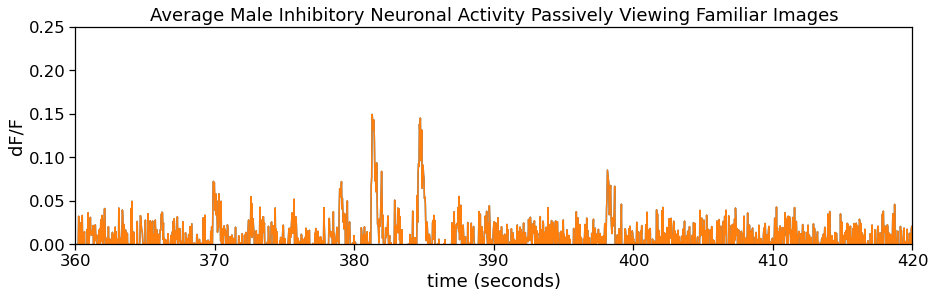

In [26]:
fig, ax = plt.subplots(1,1, figsize=(15,4))
# enumerate over experiments in this session
for i, ophys_experiment in enumerate(ophys_experiment_testmalef): 
    # get the dataset object
    dataset = cache.get_behavior_ophys_experiment(ophys_experiment_id=ophys_experiment_id)
    # get ophys timestamps
    ophys_timestamps = dataset.ophys_timestamps
    # get the population average dF/F trace
    dff_traces = dataset.dff_traces
    # dff_traces is a dataframe with a column 'dff'
    # get the values of this column and turn into a matrix of n_cells x timepoints
    dff_traces = np.vstack(dff_traces.dff.values)
    # take the mean over the cell axis
    average_dFF = np.mean(dff_traces, axis=0)
    # get the imaging_depth and targeted_structure for this experiment
    # plot it, including the imaging_depth and targeted_structure in the legend label
    ax.plot(ophys_timestamps, average_dFF)
    ax.set_title("Average Male Inhibitory Neuronal Activity Passively Viewing Familiar Images")
ax.set_ylabel('dF/F')
ax.set_xlabel('time (seconds)')
ax.set_xlim(6*60, 7*60)
ax.set_ylim(0, .25)

In [27]:
ophys_experiment_testmalef1 = [ophys_experiment_idsmf[1],ophys_experiment_idsmf[1]]

(0.0, 0.25)

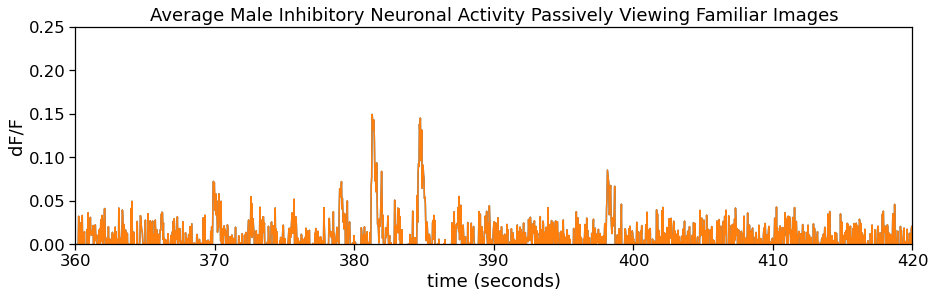

In [28]:
fig, ax = plt.subplots(1,1, figsize=(15,4))
# enumerate over experiments in this session
for i, ophys_experiment in enumerate(ophys_experiment_testmalef1): 
    # get the dataset object
    dataset = cache.get_behavior_ophys_experiment(ophys_experiment_id=ophys_experiment_id)
    # get ophys timestamps
    ophys_timestamps = dataset.ophys_timestamps
    # get the population average dF/F trace
    dff_traces = dataset.dff_traces
    # dff_traces is a dataframe with a column 'dff'
    # get the values of this column and turn into a matrix of n_cells x timepoints
    dff_traces = np.vstack(dff_traces.dff.values)
    # take the mean over the cell axis
    average_dFF = np.mean(dff_traces, axis=0)
    # get the imaging_depth and targeted_structure for this experiment
    # plot it, including the imaging_depth and targeted_structure in the legend label
    ax.plot(ophys_timestamps, average_dFF)
    ax.set_title("Average Male Inhibitory Neuronal Activity Passively Viewing Familiar Images")
ax.set_ylabel('dF/F')
ax.set_xlabel('time (seconds)')
ax.set_xlim(6*60, 7*60)
ax.set_ylim(0, .25)

(0.0, 0.25)

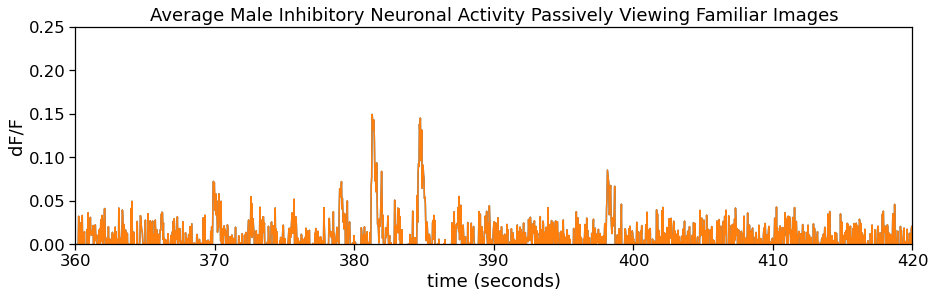

In [99]:
fig, ax = plt.subplots(1,1, figsize=(15,4))
# enumerate over experiments in this session
for i, ophys_experiment in enumerate(ophys_experiment_testmalef): 
    # get the dataset object
    dataset = cache.get_behavior_ophys_experiment(ophys_experiment_id=ophys_experiment_id)
    # get ophys timestamps
    ophys_timestamps = dataset.ophys_timestamps
    # get the population average dF/F trace
    dff_traces = dataset.dff_traces
    # dff_traces is a dataframe with a column 'dff'
    # get the values of this column and turn into a matrix of n_cells x timepoints
    dff_traces = np.vstack(dff_traces.dff.values)
    # take the mean over the cell axis
    average_dFF = np.mean(dff_traces, axis=0)
    # get the imaging_depth and targeted_structure for this experiment
    # plot it, including the imaging_depth and targeted_structure in the legend label
    ax.plot(ophys_timestamps, average_dFF)
    ax.set_title("Average Male Inhibitory Neuronal Activity Passively Viewing Familiar Images")
ax.set_ylabel('dF/F')
ax.set_xlabel('time (seconds)')
ax.set_xlim(6*60, 7*60)
ax.set_ylim(0, .25)

#### Shortening the time frame so it takes a little less to run and I can fuck with it until we get all the experiment ids with the single animals before figuring out averaging

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(15,4))
# enumerate over experiments in this session
for i, ophys_experiments in enumerate(ophys_experiment_idsmf): 
    # get the dataset object
    dataset = cache.get_behavior_ophys_experiment(ophys_experiment_id=ophys_experiment_id)
    # get ophys timestamps
    ophys_timestamps = dataset.ophys_timestamps
    # get the population average dF/F trace
    dff_traces = dataset.dff_traces
    # dff_traces is a dataframe with a column 'dff'
    # get the values of this column and turn into a matrix of n_cells x timepoints
    dff_traces = np.vstack(dff_traces.dff.values)
    # take the mean over the cell axis
    average_dFF = np.mean(dff_traces, axis=0)
    # get the imaging_depth and targeted_structure for this experiment
    # plot it, including the imaging_depth and targeted_structure in the legend label
    ax.plot(ophys_timestamps, average_dFF)
    ax.set_title("Average Male Inhibitory Neuronal Activity Passively Viewing Familiar Images")
ax.set_ylabel('dF/F')
ax.set_xlabel('time (seconds)')
ax.set_xlim(5*60, 5*60)
ax.legend()

#### Get Ophys_experiment_ids from plsmalesn

In [ ]:
ophys_session_idmn = plsmalesn.index.values[0]
ophys_session_idmn

In [ ]:
ophys_experiment_idsmn = []

for i in range(len(plsmalesn)):
    ophys_experiment_id = plsmalesn.index.values[i]
    ophys_experiment_idsmn.append(ophys_experiment_id)

print(ophys_experiment_idsmn)

#### Make male novel traces

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(15,4))
# enumerate over experiments in this session
for i, ophys_experiments in enumerate(ophys_experiment_idsmn): 
    # get the dataset object
    dataset = cache.get_behavior_ophys_experiment(ophys_experiment_id=ophys_experiment_id)
    # get ophys timestamps
    ophys_timestamps = dataset.ophys_timestamps
    # get the population average dF/F trace
    dff_traces = dataset.dff_traces
    # dff_traces is a dataframe with a column 'dff'
    # get the values of this column and turn into a matrix of n_cells x timepoints
    dff_traces = np.vstack(dff_traces.dff.values)
    # take the mean over the cell axis
    average_dFF = np.mean(dff_traces, axis=0)
    # get the imaging_depth and targeted_structure for this experiment
    # plot it, including the imaging_depth and targeted_structure in the legend label
    ax.plot(ophys_timestamps, average_dFF)
    ax.set_title("Average Male Inhibitory Neuronal Activity Passively Viewing Familiar Images")
ax.set_ylabel('dF/F')
ax.set_xlabel('time (seconds)')
ax.set_xlim(5*60, 10*60)
ax.legend()

#### Get Ophys_experiment_ids from plsfemalesf

In [ ]:
ophys_session_idff = plsfemalesf.index.values[0]
ophys_session_idff

In [ ]:
ophys_experiment_idsff = []

for i in range(len(plsfemalesf)):
    ophys_experiment_id = plsfemalesf.index.values[i]
    ophys_experiment_idsff.append(ophys_experiment_id)

print(ophys_experiment_idsff)

#### Make female familiar traces

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(15,4))
# enumerate over experiments in this session
for i, ophys_experiments in enumerate(ophys_experiment_idsff): 
    # get the dataset object
    dataset = cache.get_behavior_ophys_experiment(ophys_experiment_id=ophys_experiment_id)
    # get ophys timestamps
    ophys_timestamps = dataset.ophys_timestamps
    # get the population average dF/F trace
    dff_traces = dataset.dff_traces
    # dff_traces is a dataframe with a column 'dff'
    # get the values of this column and turn into a matrix of n_cells x timepoints
    dff_traces = np.vstack(dff_traces.dff.values)
    # take the mean over the cell axis
    average_dFF = np.mean(dff_traces, axis=0)
    # get the imaging_depth and targeted_structure for this experiment
    # plot it, including the imaging_depth and targeted_structure in the legend label
    ax.plot(ophys_timestamps, average_dFF)
    ax.set_title("Average Male Inhibitory Neuronal Activity Passively Viewing Familiar Images")
ax.set_ylabel('dF/F')
ax.set_xlabel('time (seconds)')
ax.set_xlim(5*60, 10*60)
ax.legend()

#### Get Ophys_experiment_ids from plsfemalesn

In [ ]:
ophys_session_idfn = plsfemalesn.index.values[0]
ophys_session_idfn

In [ ]:
ophys_experiment_idsfn = []

for i in range(len(plsfemalesn)):
    ophys_experiment_id = plsfemalesn.index.values[i]
    ophys_experiment_idsfn.append(ophys_experiment_id)

print(ophys_experiment_idsfn)

#### Make female novel traces

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(15,4))
# enumerate over experiments in this session
for i, ophys_experiments in enumerate(ophys_experiment_idsfn): 
    # get the dataset object
    dataset = cache.get_behavior_ophys_experiment(ophys_experiment_id=ophys_experiment_id)
    # get ophys timestamps
    ophys_timestamps = dataset.ophys_timestamps
    # get the population average dF/F trace
    dff_traces = dataset.dff_traces
    # dff_traces is a dataframe with a column 'dff'
    # get the values of this column and turn into a matrix of n_cells x timepoints
    dff_traces = np.vstack(dff_traces.dff.values)
    # take the mean over the cell axis
    average_dFF = np.mean(dff_traces, axis=0)
    # get the imaging_depth and targeted_structure for this experiment
    # plot it, including the imaging_depth and targeted_structure in the legend label
    ax.plot(ophys_timestamps, average_dFF)
    ax.set_title("Average Male Inhibitory Neuronal Activity Passively Viewing Familiar Images")
ax.set_ylabel('dF/F')
ax.set_xlabel('time (seconds)')
ax.set_xlim(5*60, 10*60)
ax.legend()

**Actual coding ends here because everything we need to do after this solely depends on this troubleshooting helps the code work and allows us to assess what the traces show before moving on. Last week the code proved to be a pain and a half to get running and trying to trouble shoot so hopefully we can fix it this time around**

In [32]:
plsmalesf.head()

,equipment_name,full_genotype,mouse_id,reporter_line,driver_line,sex,age_in_days,cre_line,indicator,session_number,...,ophys_container_id,project_code,imaging_depth,targeted_structure,date_of_acquisition,session_type,experience_level,passive,image_set,file_id
ophys_experiment_id,,,,,,,,,,,,,,,,,,,,,
961283857,CAM2P.5,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,467302,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],M,174.0,Sst-IRES-Cre,GCaMP6f,2.0,...,957024596,VisualBehavior,290,VISp,2019-10-04 21:12:37.000000,OPHYS_2_images_A_passive,Familiar,True,A,961328900
1050720434,CAM2P.3,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,533527,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],M,121.0,Sst-IRES-Cre,GCaMP6f,2.0,...,1049224697,VisualBehavior,275,VISp,2020-09-15 18:01:45.000000,OPHYS_2_images_A_passive,Familiar,True,A,1050776175
1081264133,MESO.1,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,546605,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],M,182.0,Sst-IRES-Cre,GCaMP6f,2.0,...,1079027847,VisualBehaviorMultiscope,306,VISp,2021-02-03 09:02:40.051049,OPHYS_2_images_A_passive,Familiar,True,A,1120144562
1081264129,MESO.1,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,546605,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],M,182.0,Sst-IRES-Cre,GCaMP6f,2.0,...,1079027842,VisualBehaviorMultiscope,229,VISp,2021-02-03 09:02:40.051049,OPHYS_2_images_A_passive,Familiar,True,A,1120144552
1007929142,CAM2P.3,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,495789,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],M,159.0,Sst-IRES-Cre,GCaMP6f,2.0,...,1006071814,VisualBehavior,275,VISp,2020-02-17 16:45:53.000000,OPHYS_2_images_A_passive,Familiar,True,A,1007966514


## After class to figure out for next class

In [23]:
experiment_container_id = 511510736

In [24]:
session_id = boc.get_ophys_experiments(experiment_container_ids=[experiment_container_id], stimuli=['natural_scenes'])[0]['id']

In [25]:
data_set = boc.get_ophys_experiment_data(ophys_experiment_id=session_id)
data_set

In [26]:
ts, dff = data_set.get_dff_traces()

In [27]:
dff.shape

(174, 113888)

### The dff[0,:] is giving from neuron 1 to however many neurons there are

Text(0, 0.5, 'DFF (%)')

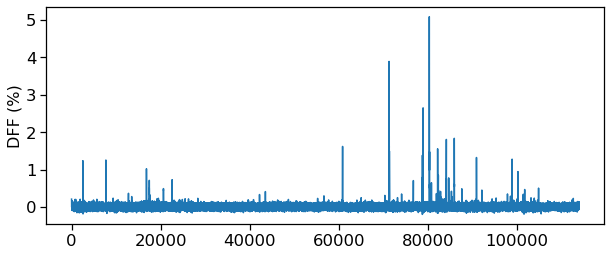

In [28]:
plt.figure(figsize=(10,4))

plt.plot(dff[0,:])

plt.ylabel("DFF (%)", fontsize=16)

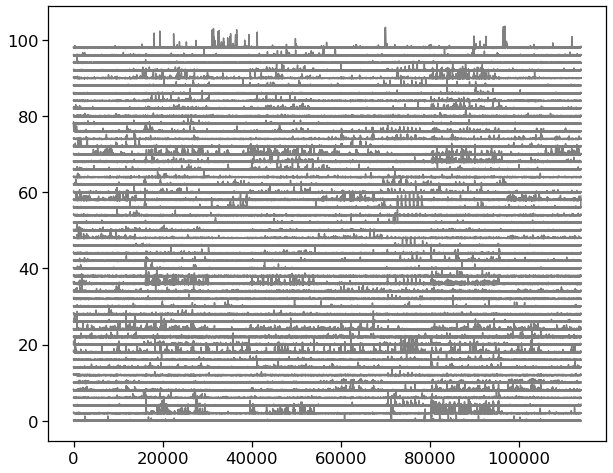

In [29]:
fig = plt.figure(figsize=(10,8))
for i in range(50):
    plt.plot(dff[i,:]+(i*2), color='gray')

In [32]:
ophys_containersmf = plsmalesf.ophys_container_id

In [33]:
ophys_containersmf

ophys_experiment_id
961283857      957024596
1050720434    1049224697
1081264133    1079027847
1081264129    1079027842
1007929142    1006071814
1081832027    1080284671
1043218895    1039579201
867410509     1018028429
867410516     1018028423
867410512     1018028426
977247468     1018028202
977247466     1018028199
851093285     1018028138
851093287     1018028144
851093289     1018028135
857698006     1018028138
1083518258    1081683701
994053903      991913453
992572516      989461845
980673831      975371413
1010530054    1006386845
1001535125     999191979
984551228      978206330
836911939      825183217
1049610116    1046576775
1049610120    1046576772
939471245     1018028393
939471248     1018028396
939471272     1026722858
939471278     1026722854
939471269     1026722861
881949070     1018028374
881949066     1018028370
881949068     1018028367
881949073     1018028364
947798775     1022731527
947798771     1022731524
947798777     1022731531
875564370     1018027599
87556

In [34]:
mouse_ids_mf = plsmalesf.mouse_id.unique()
mouse_ids_mf = mouse_ids_mf.tolist()

In [35]:
plsmalesf.mouse_id

ophys_experiment_id
961283857     467302
1050720434    533527
1081264133    546605
1081264129    546605
1007929142    495789
1081832027    546819
1043218895    524274
867410509     448366
867410516     448366
867410512     448366
977247468     482853
977247466     482853
851093285     440631
851093287     440631
851093289     440631
857698006     440631
1083518258    549976
994053903     476970
992572516     485688
980673831     477202
1010530054    498972
1001535125    489056
984551228     480753
836911939     429952
1049610116    523922
1049610120    523922
939471245     453989
939471248     453989
939471272     453988
939471278     453988
939471269     453988
881949070     435431
881949066     435431
881949068     435431
881949073     435431
947798775     453991
947798771     453991
947798777     453991
875564370     449653
875564398     449653
875564401     449653
917820362     453990
917820370     453990
917820358     453990
809497730     421136
933338719     467951
967008454     

In [37]:
mfmice = []
for mouse in mouse_ids_mf:
    for index in new_mf:
        if plsmalesf.mouse_id[index] == mouse:
            mfmice.append(index)

print(len(mfmice))
ts1, dff1 = mfmice.get_dff_traces()
    #dff = plsmalesf[index]
    
    #plt.figure(figsize=(10,4))

    #plt.plot(dff[0,:])

    #plt.ylabel("DFF (%)", fontsize=16)

51


AttributeError: 'list' object has no attribute 'get_dff_traces'

In [39]:
tsmf1, dffmf1 = plsmalesf.get_dff_traces()

AttributeError: 'DataFrame' object has no attribute 'get_dff_traces'

In [37]:
for container in ophys_containersmf:
    index = plsmalesf.index.get_loc(container)
    
    dff = plsmalesf[index]
    
    plt.figure(figsize=(10,4))

    plt.plot(dff[0,:])

    plt.ylabel("DFF (%)", fontsize=16)

KeyError: 957024596

## Resources:


### Sample Allen Jupyter Notebooks to get started:
https://allensdk.readthedocs.io/en/latest/visual_behavior_optical_physiology.html
https://allensdk.readthedocs.io/en/latest/visual_coding_neuropixels.html
https://datacarpentry.org/python-ecology-lesson/05-merging-data/index.html


Insert text. 